# PolyNER Demo Notebook

This notebook demonstrates the key features of the PolyNER library for multilingual Named Entity Recognition with emoji support.

## Setup

First, let's make sure that PolyNER is installed and we have all necessary dependencies.

In [1]:
# Uncomment to install polyner if not already installed
# !pip install polyner

# For development installation (if working from a local clone of the repo)
!pip install -e .

# We'll also need these packages for visualization
!pip install matplotlib seaborn

Obtaining file:///C:/Users/Yuuv/OneDrive/Desktop/Personal%20Projects/PolyNER
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Checking if build backend supports build_editable: started
  Checking if build backend supports build_editable: finished with status 'done'
  Getting requirements to build editable: started
  Getting requirements to build editable: finished with status 'done'
  Preparing editable metadata (pyproject.toml): started
  Preparing editable metadata (pyproject.toml): finished with status 'done'
  Building editable for polyner (pyproject.toml): started
  Building editable for polyner (pyproject.toml): finished with status 'done'
  Created wheel for polyner: filename=polyner-0.1.0-0.editable-py3-none-any.whl size=3921 sha256=cfba6806b149b44a2b0608e5d41f8d492b04f510d84f5f91c30c42d9563e7fad
  Stored in directory: C:\Users\Yuuv\AppData\Local\Temp\pip-ephem-wheel-cache-k95ybjc2\wheels\ea\35\33\991e2c6d04240a3f42f7f59d7f

In [2]:
# Import PolyNER and related libraries
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set up matplotlib for better visualization
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (14, 8)

# Import PolyNER and related utilities
from polyner import PolyNER
from polyner.utils import (
    filter_by_language, 
    filter_emojis, 
    filter_by_entity,
    get_language_distribution, 
    get_entity_distribution,
    get_emoji_distribution
)
from polyner.entity_recognition import DictionaryEntityRecognizer

## Feature 1: Basic Text Processing

Let's start with processing a simple English text to see the basic output format.

In [3]:
# Initialize the PolyNER processor
processor = PolyNER()

# Process a simple English text
text = "Apple Inc. is headquartered in Cupertino, California. The company was founded by Steve Jobs."
result = processor.process(text)

# Display the result
result

,token,language,is_emoji,norm_token,entity_label
0,Apple,en,False,apple,ORG
1,Inc.,en,False,inc.,None
2,is,None,False,is,None
3,headquartered,en,False,headquartered,None
4,in,None,False,in,None
5,Cupertino,it,False,cupertino,GPE
6,",",None,False,",",None
7,California,en,False,california,GPE
8,.,None,False,.,None
9,The,en,False,the,None


### Understanding the Output

Let's examine the columns in the output DataFrame:

- `token`: The individual word or character
- `language`: Detected language code (e.g., 'en' for English)
- `is_emoji`: Boolean flag indicating if the token is an emoji
- `norm_token`: Normalized version of the token (lowercase, accents removed)
- `entity_label`: Named entity type if recognized (e.g., 'ORG' for organization, 'PERSON' for person)

Now, let's look at just the entities that were detected:

In [4]:
# Filter to show only detected entities
entities = filter_by_entity(result)
entities

,token,language,is_emoji,norm_token,entity_label
0,Apple,en,False,apple,ORG
5,Cupertino,it,False,cupertino,GPE
7,California,en,False,california,GPE
14,Steve,da,False,steve,PERSON


## Feature 2: Multilingual Support

Let's test PolyNER's ability to handle multiple languages in the same text.

In [5]:
# Text with multiple languages
multilingual_text = """
Hello, my name is John Smith. I work for Microsoft in Seattle.
Bonjour, je m'appelle Pierre Dupont. Je travaille pour Google à Paris.
Hola, me llamo Carlos García. Trabajo para Amazon en Madrid.
你好，我叫李明。我在北京的百度工作。
"""

# Process the multilingual text
multi_result = processor.process(multilingual_text)

# Get language distribution
lang_dist = get_language_distribution(multi_result)

# Display the language distribution
print("Language distribution:")
for lang, count in lang_dist.items():
    print(f"{lang}: {count} tokens")

# Display a sample of each detected language
for lang in lang_dist.keys():
    print(f"\nSample of tokens in {lang}:")
    lang_tokens = filter_by_language(multi_result, lang)
    print(lang_tokens['token'].head().tolist())

Language distribution:
fr: 4 tokens
es: 3 tokens
de: 2 tokens
en: 2 tokens
tl: 2 tokens
fi: 1 tokens
af: 1 tokens
da: 1 tokens
sq: 1 tokens
sv: 1 tokens
so: 1 tokens
id: 1 tokens
tr: 1 tokens
lt: 1 tokens
hu: 1 tokens
cy: 1 tokens
zh-cn: 1 tokens

Sample of tokens in fr:
['Bonjour', 'Dupont', 'travaille', 'pour']

Sample of tokens in es:
['llamo', 'Carlos', 'García']

Sample of tokens in de:
['John', 'Pierre']

Sample of tokens in en:
['Microsoft', 'Seattle']

Sample of tokens in tl:
['name', 'para']

Sample of tokens in fi:
['Hello']

Sample of tokens in af:
['work']

Sample of tokens in da:
['for']

Sample of tokens in sq:
['Smith']

Sample of tokens in sv:
["m'appelle"]

Sample of tokens in so:
['Google']

Sample of tokens in id:
['Paris']

Sample of tokens in tr:
['Hola']

Sample of tokens in lt:
['Trabajo']

Sample of tokens in hu:
['Amazon']

Sample of tokens in cy:
['Madrid']

Sample of tokens in zh-cn:
['你好，我叫李明。我在北京的百度工作']


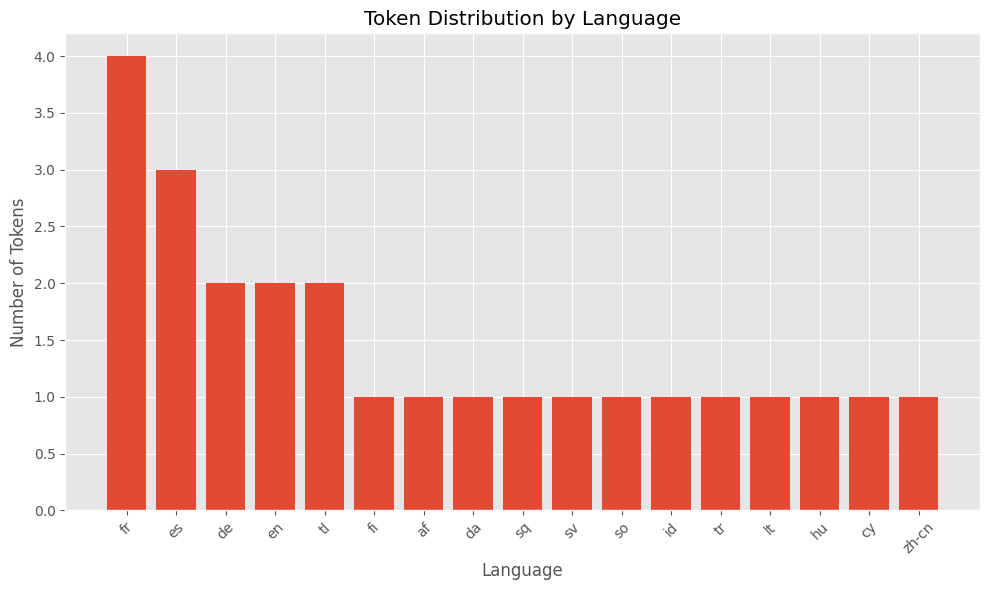

In [6]:
# Visualize language distribution
plt.figure(figsize=(10, 6))
plt.bar(lang_dist.keys(), lang_dist.values())
plt.title('Token Distribution by Language')
plt.xlabel('Language')
plt.ylabel('Number of Tokens')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Feature 3: Entity Recognition Across Languages

Let's see how well PolyNER recognizes entities in different languages.

In [7]:
# Extract and display entities from the multilingual text
multi_entities = filter_by_entity(multi_result)
multi_entities

,token,language,is_emoji,norm_token,entity_label
5,John,de,False,john,PERSON
11,Microsoft,en,False,microsoft,ORG
13,Seattle,en,False,seattle,GPE
15,Bonjour,fr,False,bonjour,CARDINAL
18,m'appelle,sv,False,m'appelle,ORG
19,Pierre,de,False,pierre,PERSON
20,Dupont,fr,False,dupont,ORG
23,travaille,fr,False,travaille,PERSON
27,Paris,id,False,paris,GPE
33,Carlos,es,False,carlos,PERSON


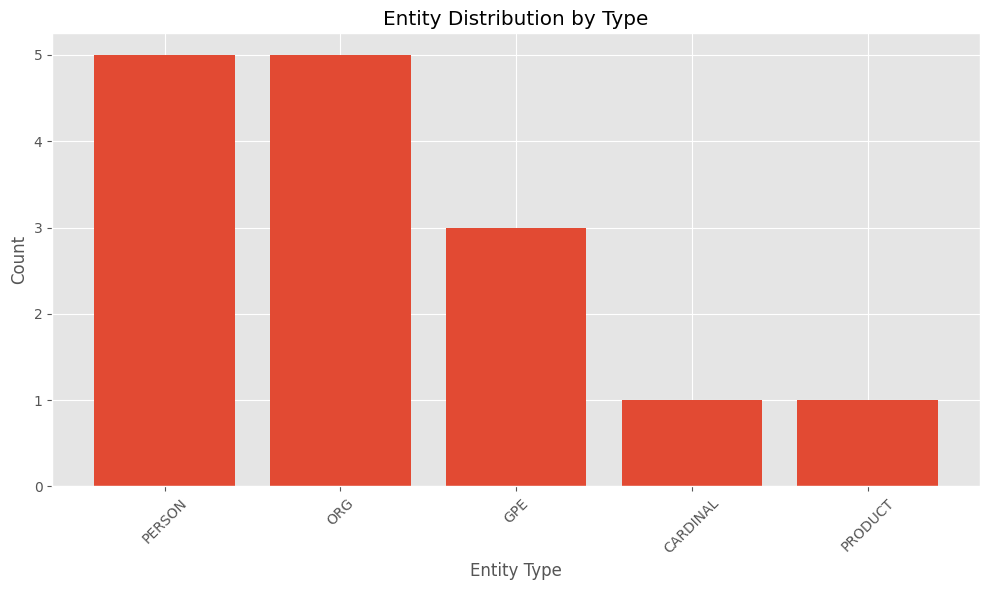

In [8]:
# Get entity distribution by type
entity_dist = get_entity_distribution(multi_result)

# Visualize entity distribution
plt.figure(figsize=(10, 6))
plt.bar(entity_dist.keys(), entity_dist.values())
plt.title('Entity Distribution by Type')
plt.xlabel('Entity Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Feature 4: Emoji Handling

Let's test how PolyNER handles text with emojis.

In [9]:
# Text with emojis
emoji_text = """
I love visiting New York City! 🗽 The Statue of Liberty is amazing. 😍
Tokyo 🗼 is also on my list, and I want to see the cherry blossoms! 🌸
Paris and the Eiffel Tower 🇫🇷 are romantic, especially at night. ✨
I'm saving up to go on a world tour! 🌍 ✈️ 🧳
"""

# Process the text
emoji_result = processor.process(emoji_text)

# Extract emojis
emojis = filter_emojis(emoji_result)
emojis

,token,language,is_emoji,norm_token,entity_label
7,🗽,None,True,🗽,None
15,😍,None,True,😍,None
17,🗼,None,True,🗼,None
33,🌸,None,True,🌸,None
48,✨,None,True,✨,None
60,🌍,None,True,🌍,None
61,✈,None,True,✈,None
63,🧳,None,True,🧳,None


In [10]:
# Get emoji distribution
emoji_dist = get_emoji_distribution(emoji_result)

# Display emoji distribution
print("Emoji distribution:")
for emoji, count in emoji_dist.items():
    print(f"{emoji}: {count}")

Emoji distribution:
🗽: 1
😍: 1
🗼: 1
🌸: 1
✨: 1
🌍: 1
✈: 1
🧳: 1


## Feature 5: Custom Entity Dictionaries

One of PolyNER's powerful features is the ability to add custom entity dictionaries for domain-specific recognition.

In [11]:
# Create a custom dictionary recognizer
dict_recognizer = DictionaryEntityRecognizer()

# Add custom dictionaries for tech products and companies
dict_recognizer.add_entity_dictionary(
    "SMARTPHONE",
    ["iPhone 13", "iPhone 12", "Galaxy S21", "Pixel 6", "OnePlus 9"],
    case_sensitive=True
)

dict_recognizer.add_entity_dictionary(
    "LAPTOP",
    ["MacBook Pro", "MacBook Air", "Dell XPS", "ThinkPad X1", "Surface Laptop"],
    case_sensitive=True
)

dict_recognizer.add_entity_dictionary(
    "TECH_COMPANY",
    ["Apple", "Google", "Microsoft", "Amazon", "Meta", "Samsung", "Tesla"],
    case_sensitive=True
)

# Sample text about tech products
tech_text = """
I recently upgraded from my old iPhone 12 to the new iPhone 13 Pro Max, and the camera is amazing!
My friend uses a Galaxy S21 and loves it too. For work, I use a MacBook Pro, but I'm considering
switching to a Dell XPS or ThinkPad X1 for better compatibility with our office software.

Apple and Google are releasing new AI features, while Microsoft is focusing on cloud services.
Meta (formerly Facebook) is investing heavily in VR technology.
"""

# Recognize entities using the custom dictionaries
custom_entities = dict_recognizer.recognize_entities(tech_text)

# Display the results
print("Detected tech entities:")
for entity in custom_entities:
    print(f"{entity['text']} - {entity['label']}")

Detected tech entities:
iPhone 12 - SMARTPHONE
iPhone 13 - SMARTPHONE
Galaxy S21 - SMARTPHONE
MacBook Pro - LAPTOP
Dell XPS - LAPTOP
ThinkPad X1 - LAPTOP
Apple - TECH_COMPANY
Google - TECH_COMPANY
Microsoft - TECH_COMPANY
Meta - TECH_COMPANY



Entity counts by type:
SMARTPHONE: 3
LAPTOP: 3
TECH_COMPANY: 4


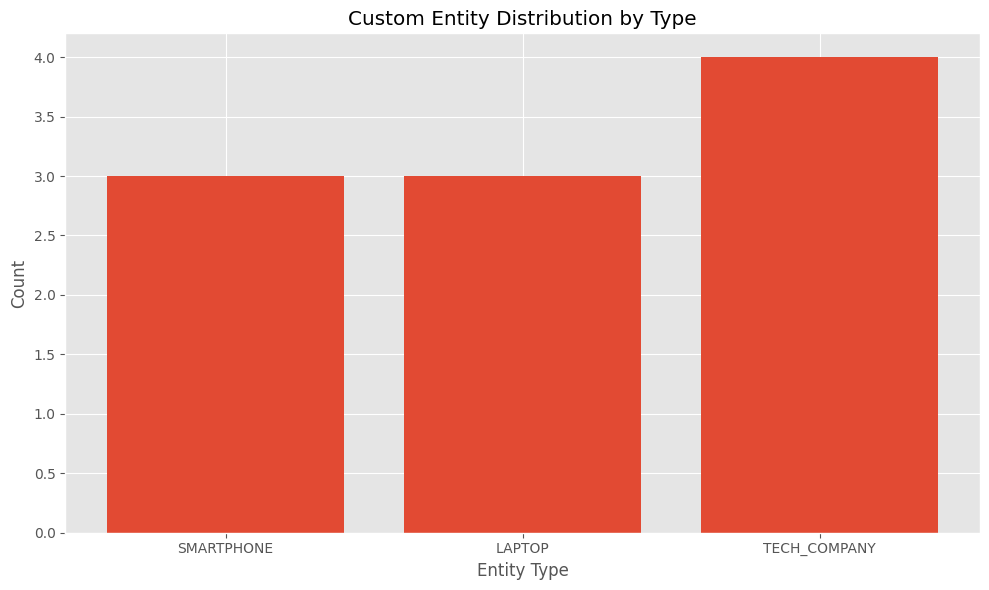

In [12]:
# Count entities by type
entity_counts = {}
for entity in custom_entities:
    label = entity["label"]
    if label not in entity_counts:
        entity_counts[label] = 0
    entity_counts[label] += 1

# Display entity counts
print("\nEntity counts by type:")
for label, count in entity_counts.items():
    print(f"{label}: {count}")

# Visualize entity counts
plt.figure(figsize=(10, 6))
plt.bar(entity_counts.keys(), entity_counts.values())
plt.title('Custom Entity Distribution by Type')
plt.xlabel('Entity Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## Feature 6: Combined Approach

Let's demonstrate how to combine the standard NER with custom dictionaries for a comprehensive approach.

In [13]:
# Create a custom dictionary recognizer for medical terms
medical_recognizer = DictionaryEntityRecognizer()

# Add medical dictionaries
medical_recognizer.add_entity_dictionary(
    "MEDICATION",
    ["Aspirin", "Ibuprofen", "Paracetamol", "Amoxicillin", "Lipitor", "Prozac", "Metformin"],
    case_sensitive=True
)

medical_recognizer.add_entity_dictionary(
    "CONDITION",
    ["Hypertension", "Diabetes", "Type 2 Diabetes", "Asthma", "Arthritis", "Depression"],
    case_sensitive=True
)

# Sample medical text
medical_text = """
Patient John Smith (42) was admitted to Massachusetts General Hospital in Boston on June 15, 2023.
He has a history of Hypertension and Type 2 Diabetes. Current medications include Lipitor (20mg daily)
and Metformin (500mg twice daily). The patient reported taking Ibuprofen for occasional headaches.
Dr. Sarah Johnson recommended continuing current treatment and scheduled a follow-up appointment
in 3 months at the clinic in New York.
"""

# Process with standard NER
standard_result = processor.process(medical_text)

# Display standard NER results
print("Standard NER results:")
std_entities = standard_result[standard_result["entity_label"].notna()]
for _, row in std_entities.iterrows():
    print(f"{row['token']} - {row['entity_label']}")

# Process with custom medical dictionary
medical_entities = medical_recognizer.recognize_entities(medical_text)

# Display custom medical entities
print("\nCustom medical entities:")
for entity in medical_entities:
    print(f"{entity['text']} - {entity['label']}")

Standard NER results:
John - PERSON
42 - CARDINAL
Massachusetts - GPE
Boston - GPE
June - DATE
15 - CARDINAL
2023 - DATE
2 - CARDINAL
20 - CARDINAL
daily - DATE
500 - CARDINAL
daily - DATE
Ibuprofen - ORG
Sarah - PERSON
Johnson - PERSON
3 - CARDINAL
months - DATE

Custom medical entities:
Hypertension - CONDITION
Type 2 Diabetes - CONDITION
Lipitor - MEDICATION
Metformin - MEDICATION
Ibuprofen - MEDICATION


## Feature 7: Batch Processing

Let's demonstrate how to process multiple texts at once using the batch processing feature.

In [14]:
# Create a batch of texts
texts = [
    "Apple Inc. is headquartered in Cupertino, California.",
    "Google's main office is in Mountain View.",
    "Amazon was founded by Jeff Bezos in Seattle.",
    "Microsoft is based in Redmond, Washington."
]

# Process the batch
batch_results = processor.process_batch(texts)

# Display entities from each text
for i, result in enumerate(batch_results):
    print(f"Text {i+1}: {texts[i]}")
    entities = result[result["entity_label"].notna()]
    if not entities.empty:
        print("Detected entities:")
        for _, row in entities.iterrows():
            print(f"  {row['token']} - {row['entity_label']}")
    else:
        print("No entities detected.")
    print()

Text 1: Apple Inc. is headquartered in Cupertino, California.
Detected entities:
  Apple - ORG
  Cupertino - GPE
  California - GPE

Text 2: Google's main office is in Mountain View.
No entities detected.

Text 3: Amazon was founded by Jeff Bezos in Seattle.
Detected entities:
  Amazon - ORG
  Jeff - PERSON
  Bezos - PERSON
  Seattle - GPE

Text 4: Microsoft is based in Redmond, Washington.
Detected entities:
  Microsoft - ORG
  Washington - GPE



## Feature 8: Analysis of Social Media Content

Social media content often contains a mix of languages, emojis, and entities. Let's see how PolyNER handles this type of content.

In [15]:
# Sample social media post
social_media_post = """
Just had an amazing dinner at Le Petit Bistro in Paris! 🍷 The escargot was délicieux! 
Next stop: Berlin for Oktoberfest! 🍺 Can't wait to try some authentic German bratwurst.
私は日本食も大好きです。寿司と天ぷらは最高です！🍣
Follow my food adventures on Instagram @foodie_traveler and check out my latest YouTube video!
"""

# Process the social media post
social_result = processor.process(social_media_post)

# Display language distribution
social_lang_dist = get_language_distribution(social_result)
print("Language distribution:")
for lang, count in social_lang_dist.items():
    print(f"{lang}: {count} tokens")

# Display emojis
social_emojis = filter_emojis(social_result)
print("\nEmojis:")
print(social_emojis['token'].tolist())

# Display entities
social_entities = filter_by_entity(social_result)
print("\nDetected entities:")
for _, row in social_entities.iterrows():
    print(f"{row['token']} - {row['entity_label']}")

Language distribution:
en: 8 tokens
de: 6 tokens
sw: 3 tokens
fr: 3 tokens
es: 2 tokens
no: 2 tokens
af: 2 tokens
et: 1 tokens
id: 1 tokens
sq: 1 tokens
so: 1 tokens
cs: 1 tokens
da: 1 tokens
ja: 1 tokens
ca: 1 tokens
tl: 1 tokens

Emojis:
['🍷', '🍺', '🍣']

Detected entities:
Paris - GPE
délicieux - ORG
Berlin - GPE
Oktoberfest - ORG
German - NORP
bratwurst - PERSON
@foodie_traveler - ORG
YouTube - ORG


## Advanced Analysis: Visualizing the Results

Let's create a more comprehensive visualization of the analysis results.

In [16]:
def analyze_and_visualize(text, title="Text Analysis"):
    # Process the text
    result = processor.process(text)
    
    # Get distributions
    lang_dist = get_language_distribution(result)
    entity_dist = get_entity_distribution(result)
    emoji_dist = get_emoji_distribution(result)
    
    # Create a figure with subplots
    fig, axs = plt.subplots(1, 3, figsize=(20, 6))
    fig.suptitle(title, fontsize=16)
    
    # Plot language distribution
    if lang_dist:
        axs[0].bar(lang_dist.keys(), lang_dist.values())
        axs[0].set_title('Language Distribution')
        axs[0].set_xlabel('Language')
        axs[0].set_ylabel('Token Count')
        axs[0].tick_params(axis='x', rotation=45)
    else:
        axs[0].text(0.5, 0.5, 'No language data', ha='center', va='center')
        axs[0].set_title('Language Distribution')
    
    # Plot entity distribution
    if entity_dist:
        axs[1].bar(entity_dist.keys(), entity_dist.values(), color='green')
        axs[1].set_title('Entity Distribution')
        axs[1].set_xlabel('Entity Type')
        axs[1].set_ylabel('Count')
        axs[1].tick_params(axis='x', rotation=45)
    else:
        axs[1].text(0.5, 0.5, 'No entities detected', ha='center', va='center')
        axs[1].set_title('Entity Distribution')
    
    # Plot emoji distribution
    if emoji_dist:
        emojis = list(emoji_dist.keys())
        counts = list(emoji_dist.values())
        axs[2].bar(range(len(emojis)), counts, color='orange')
        axs[2].set_title('Emoji Distribution')
        axs[2].set_xlabel('Emoji')
        axs[2].set_ylabel('Count')
        axs[2].set_xticks(range(len(emojis)))
        axs[2].set_xticklabels(emojis, fontsize=14)
    else:
        axs[2].text(0.5, 0.5, 'No emojis detected', ha='center', va='center')
        axs[2].set_title('Emoji Distribution')
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()
    
    # Return the processed result for further analysis
    return result

C:\Users\Yuuv\AppData\Local\Temp\ipykernel_16176\1063374595.py:50: UserWarning: Glyph 127863 (\N{WINE GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.95])
C:\Users\Yuuv\AppData\Local\Temp\ipykernel_16176\1063374595.py:50: UserWarning: Glyph 127866 (\N{BEER MUG}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.95])
C:\Users\Yuuv\AppData\Local\Temp\ipykernel_16176\1063374595.py:50: UserWarning: Glyph 127843 (\N{SUSHI}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.95])
c:\Users\Yuuv\anaconda3\envs\polyner\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127863 (\N{WINE GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Yuuv\anaconda3\envs\polyner\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127866 (\N{BEER MUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Yuuv\anaconda3\envs\polyner\lib\s

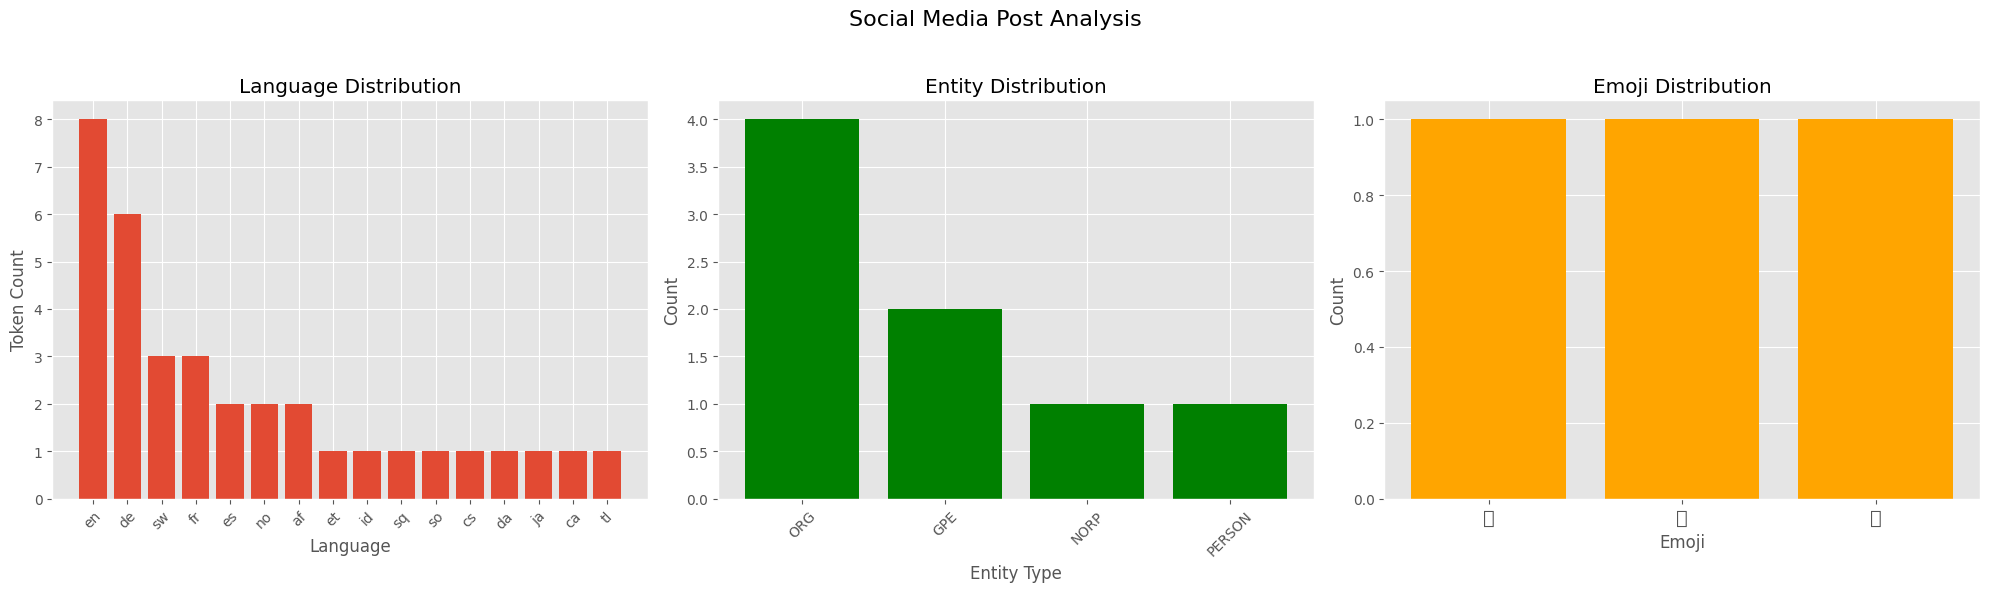

In [17]:
# Analyze and visualize the social media post
social_result = analyze_and_visualize(social_media_post, "Social Media Post Analysis")

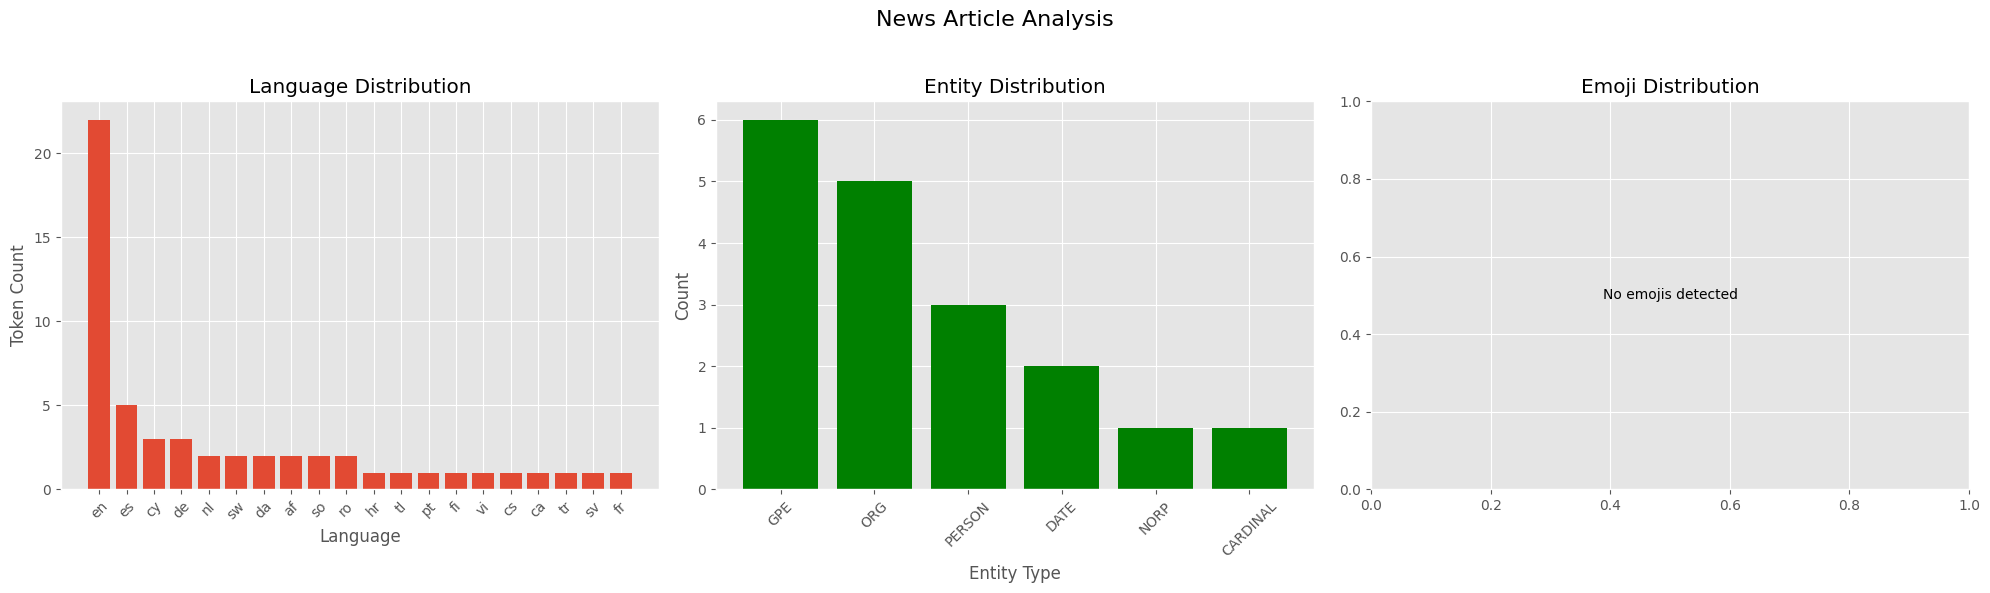

In [18]:
# Analyze and visualize the news article
news_article = """
WASHINGTON (Reuters) - U.S. President Joe Biden met with Chinese President Xi Jinping 
at the G20 summit in Rome on Tuesday. The leaders discussed trade relations between 
the United States and China, as well as climate change initiatives ahead of the 
COP26 conference in Glasgow, Scotland.

Meanwhile, tech giants Apple and Google announced new AI partnerships, 
while Tesla's stock surged 5% after reporting record quarterly earnings.
"""

news_result = analyze_and_visualize(news_article, "News Article Analysis")

## Conclusion

This notebook has demonstrated the key features of the PolyNER library:

1. Basic text processing and entity recognition
2. Multilingual support
3. Emoji handling
4. Custom entity dictionaries
5. Combined approaches for domain-specific entity recognition
6. Batch processing
7. Analysis of mixed content (like social media posts)
8. Visualization of analysis results

PolyNER provides a comprehensive toolkit for processing and analyzing text that contains multiple languages, emojis, and specialized domain terminology.